https://raw.githubusercontent.com/edsters78/Project_Proposal/main/student-mat.csv <br> 
This is the link to the data set we are using.

In [102]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(scales)


# Title

Predicting a Student's Success

## Introduction
We, group 18, have decided to look into a dataset measuring factors which contribute to a students academic achievement, where academic achievement is measured by a student's grades. It is of utmost importance for educators to understand which factors (such as age, family income, demographics et cetera) contribute to a students academic success in order to adjust pedagogical practices to support and optimize a students learning. The question that we intend to answer is can we accurately predict a student's academic achievement (grade), based on a variety of factors. We will answer this by creating a machine learning knn classification model that will predict student grades, and based on these predictions, we will relate it back to the true values to assess the models accuracy. 

The dataset that we, group 18, have chosen is called Student Grade Prediction, which is a data set consisting of 33 columns and 395 rows, containing data of students from two different Portuguese secondary education institutes. The columns contain factors that the researchers deemed to be relevant in determining a student's academic achievements. Examples of these factors (variables) include the students sex, there relative health and the amount of time spent studying. 


## Preliminary Exploratory Data Analysis

In [103]:
#reading data from web
options(repr.matrix.max.rows = 10)
url<-"https://raw.githubusercontent.com/edsters78/Project_Proposal/main/student-mat.csv"
student_data<-read_csv(url)
#student_data

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



In [104]:
#tidying the data
#selecting only the variables that will be most relevant
student_data_clean <- student_data %>%
    select(sex, address, Medu, Fedu, traveltime, studytime, paid, activities, internet, famrel, Dalc, Walc, health, absences, G3) 
#student_data_clean

student_data_clean_nonly <- student_data_clean %>%
    mutate(sex = ifelse(sex == "F", 1, 0), #1 is female, 0 is male
          address = ifelse(address == "U", 1, 0), #1 is Urban, 0 is Rural
          paid = ifelse(paid == "yes", 1, 0), #1 is yes, 0 is no
          activities = ifelse(activities == "yes", 1, 0), #1 is yes, 0 is no
          internet = ifelse(internet == "yes", 1, 0)) #1 is yes, 0 is no
student_data_clean_nonly

sex,address,Medu,Fedu,traveltime,studytime,paid,activities,internet,famrel,Dalc,Walc,health,absences,G3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4,4,2,2,0,0,0,4,1,1,3,6,6
1,1,1,1,1,2,0,0,1,5,1,1,3,4,6
1,1,1,1,1,2,1,0,1,4,2,3,3,10,10
1,1,4,2,1,3,1,1,1,3,1,1,5,2,15
1,1,3,3,1,2,1,0,0,4,1,2,5,4,10
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,1,2,2,1,2,1,0,0,5,4,5,4,11,9
0,1,3,1,2,1,0,0,1,2,3,4,2,3,16
0,0,1,1,1,1,0,0,0,5,3,3,3,3,7


In [105]:
#splitting into training and testing data
student_split <- initial_split(student_data_clean_nonly, prop = 0.75, strat = G3)
student_train <- training(student_split)
student_test <- testing(student_split)

student_train
#student_test

sex,address,Medu,Fedu,traveltime,studytime,paid,activities,internet,famrel,Dalc,Walc,health,absences,G3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4,4,2,2,0,0,0,4,1,1,3,6,6
1,1,1,1,1,2,0,0,1,5,1,1,3,4,6
1,1,1,1,1,2,1,0,1,4,2,3,3,10,10
1,1,4,2,1,3,1,1,1,3,1,1,5,2,15
0,1,4,3,1,2,1,1,1,5,1,2,5,10,15
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,1,3,1,1,2,1,0,1,4,1,1,1,0,8
1,1,1,1,2,2,0,1,0,1,1,1,5,0,0
0,1,3,1,2,1,0,0,1,2,3,4,2,3,16


In [117]:
#table summarizing data
student_train1<-student_train%>%
    select_if(is.numeric, na.rm=TRUE)%>%
    map(summary)

student_train1

number_of_rows<- nrow(student_train)
print(paste("rows in training dataset:", as.character(number_of_rows)))


$sex
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.5403  1.0000  1.0000 

$address
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.7752  1.0000  1.0000 

$Medu
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   2.768   4.000   4.000 

$Fedu
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   2.567   4.000   4.000 

$traveltime
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    1.44    2.00    4.00 

$studytime
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.250   2.000   2.064   2.000   4.000 

$paid
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4698  1.0000  1.0000 

$activities
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.5101  1.0000  1.0000 

$internet
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   0.849   1.000   1.000 

$famrel
   Min. 1st Qu.  Median 

[1] "rows in training dataset: 298"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



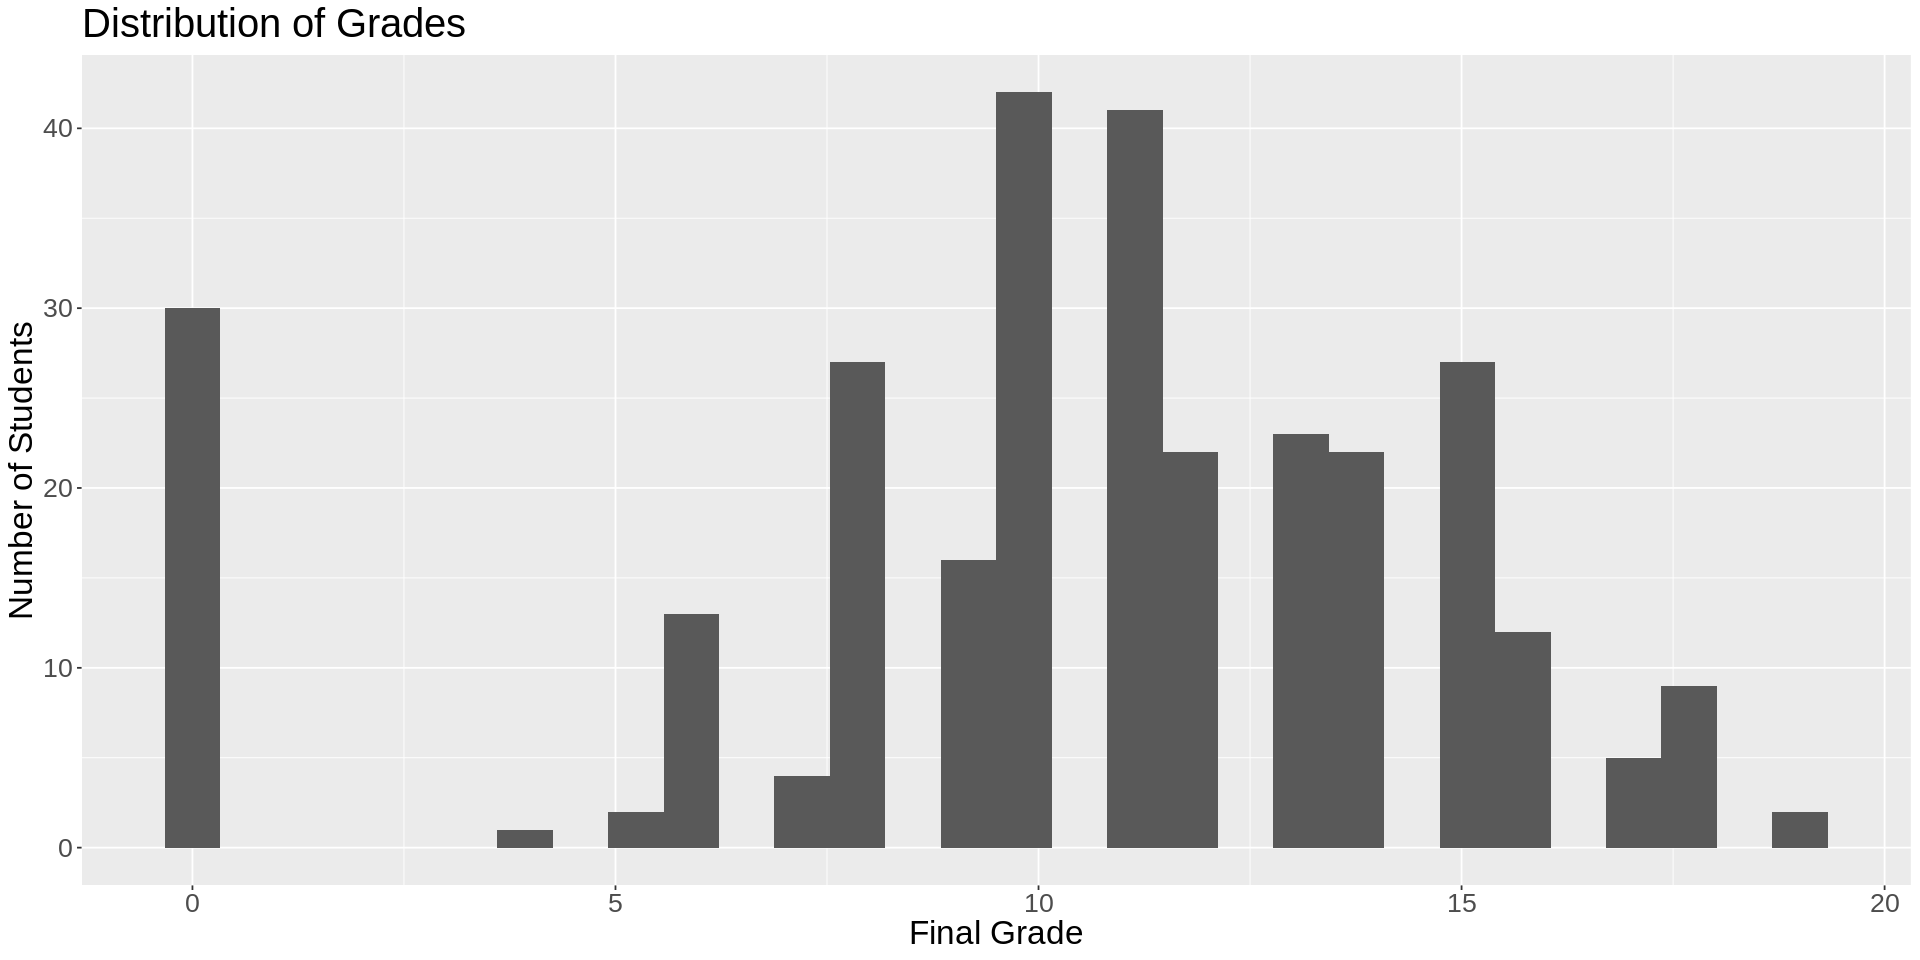

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



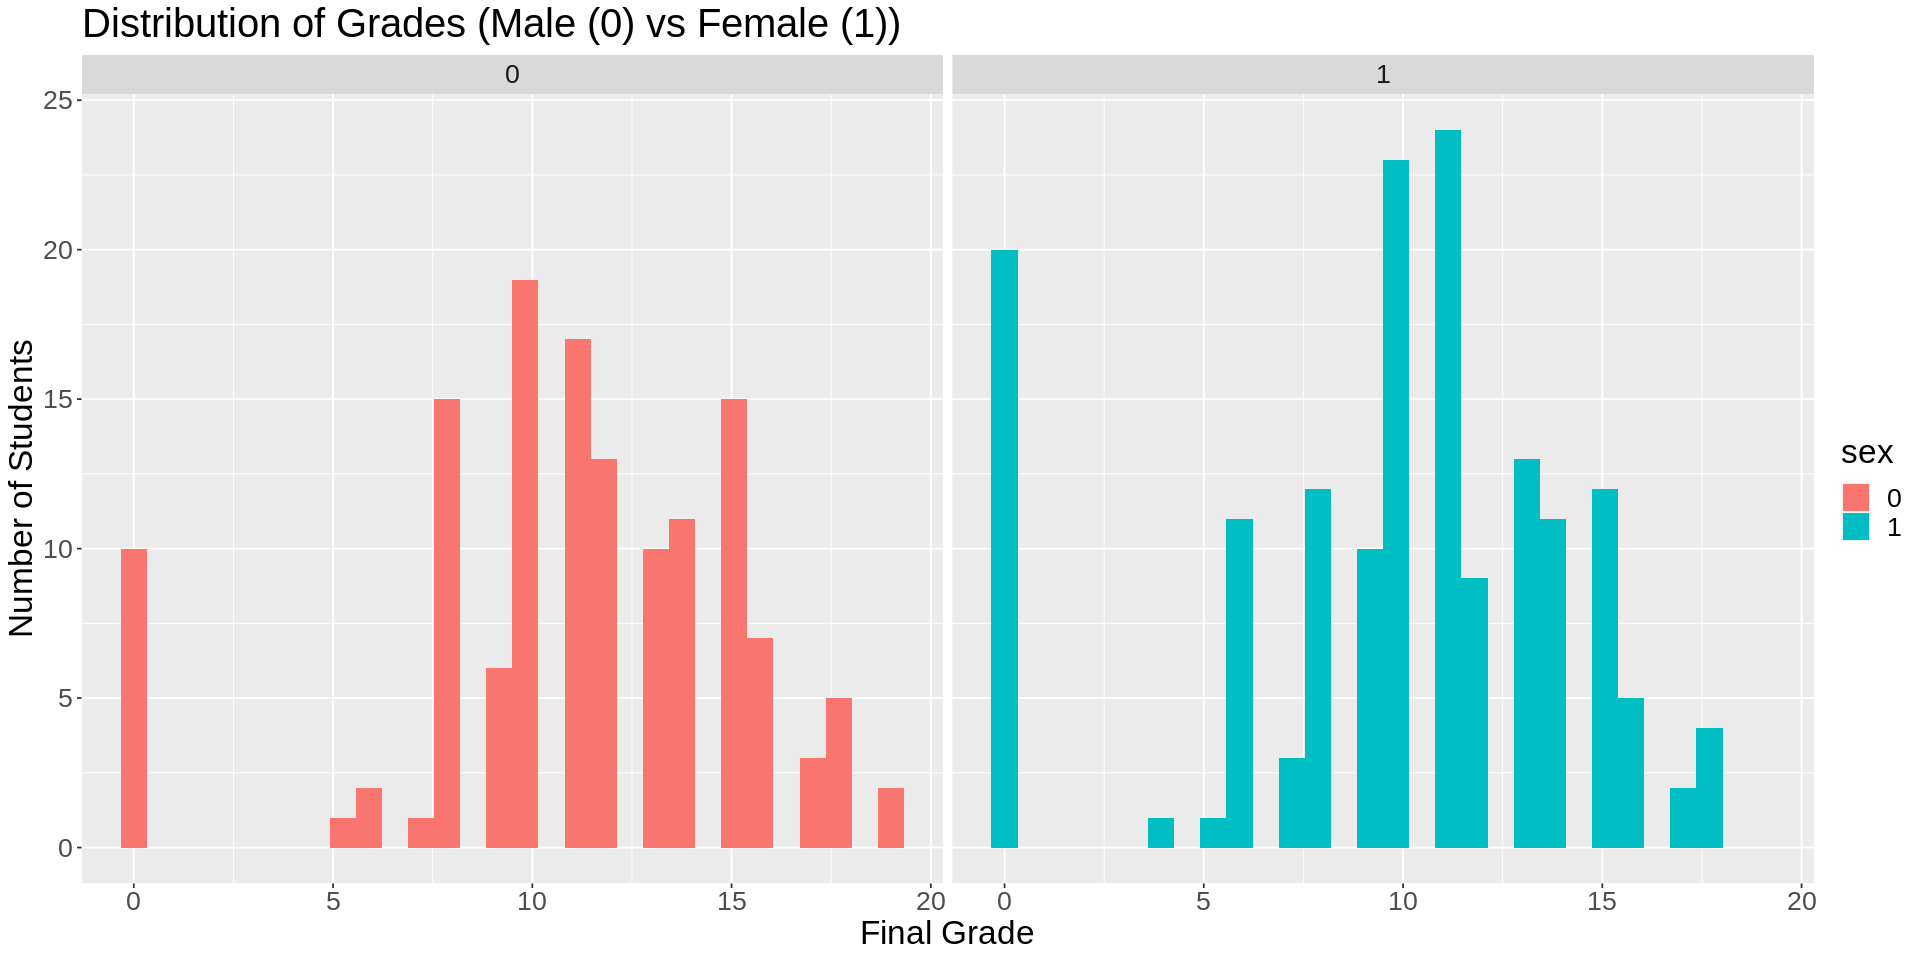

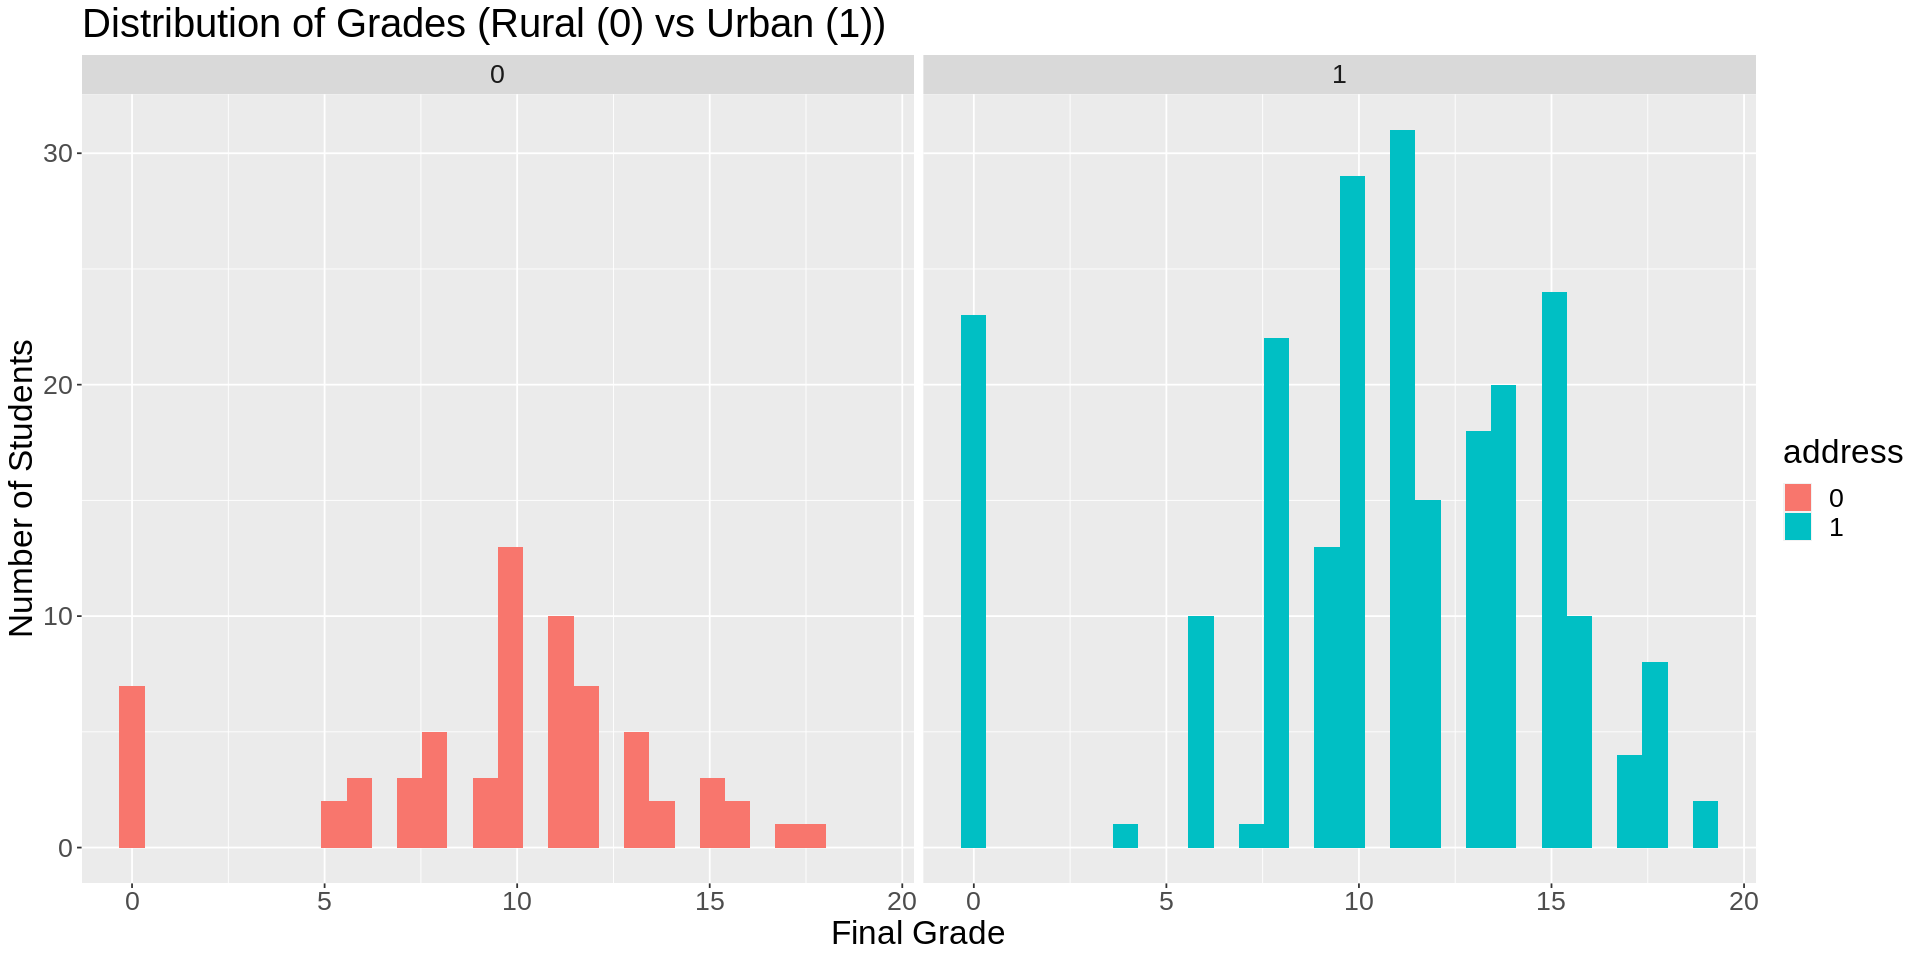

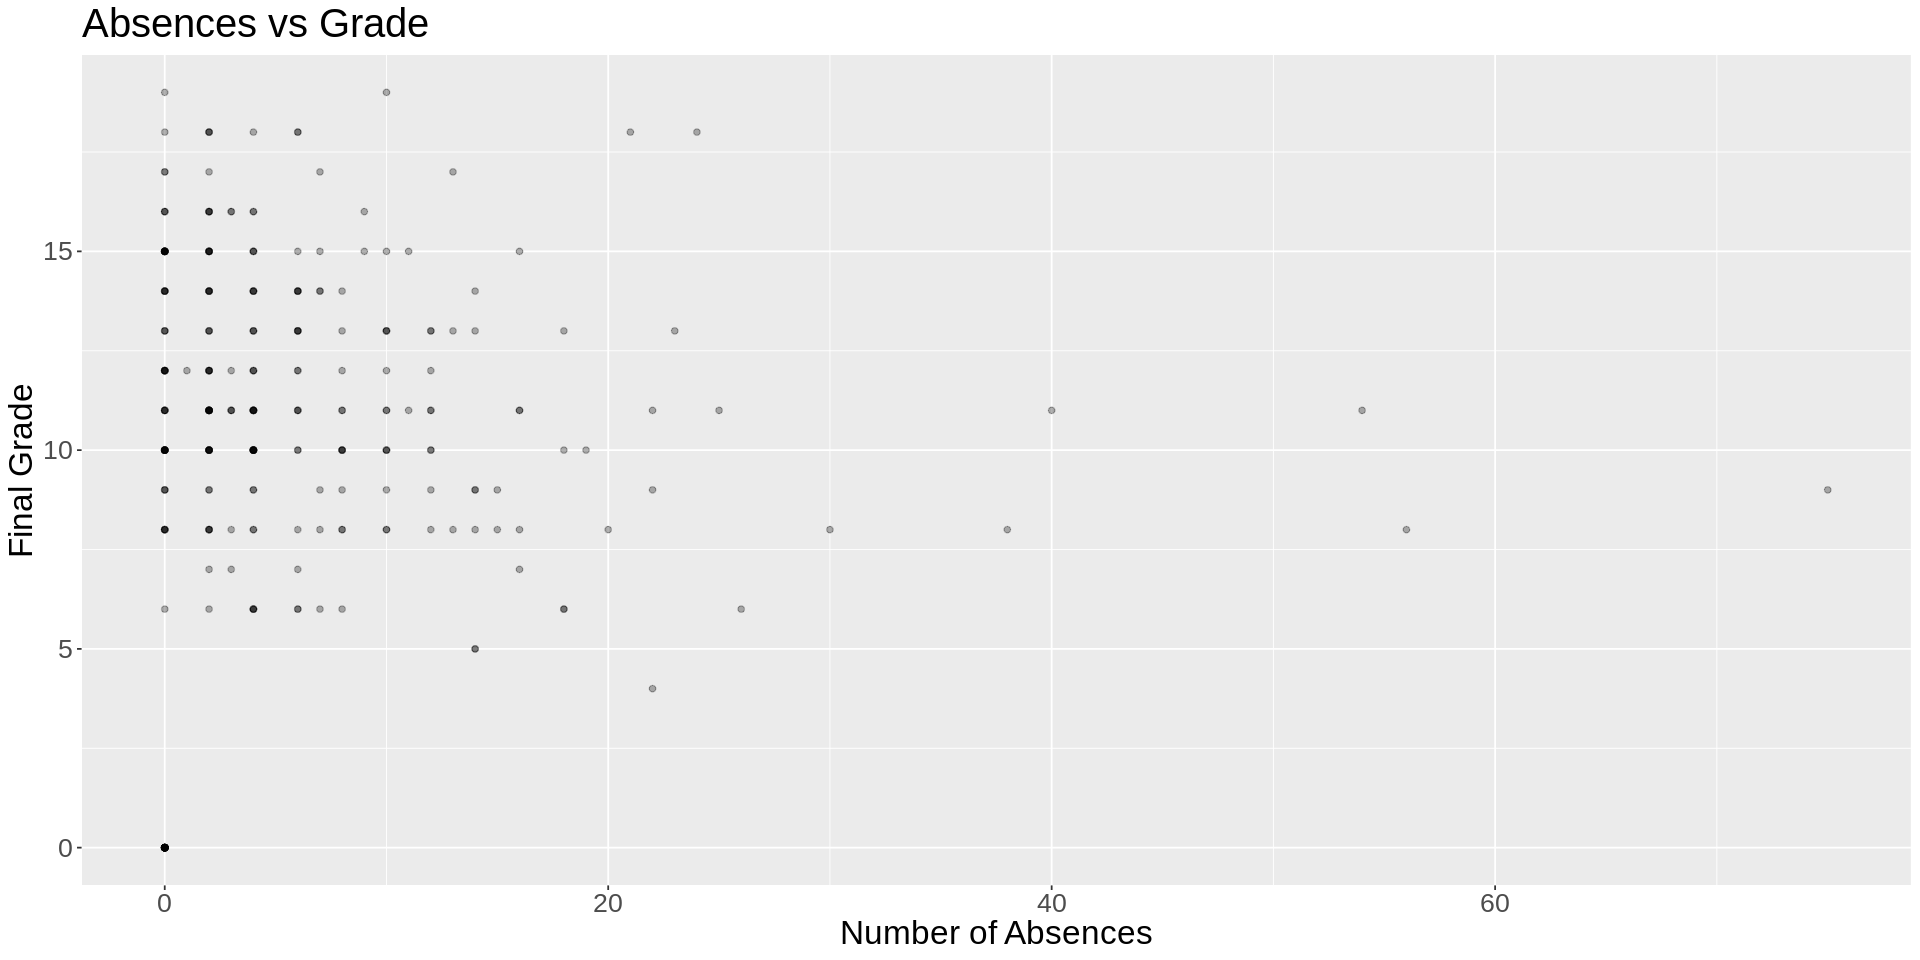

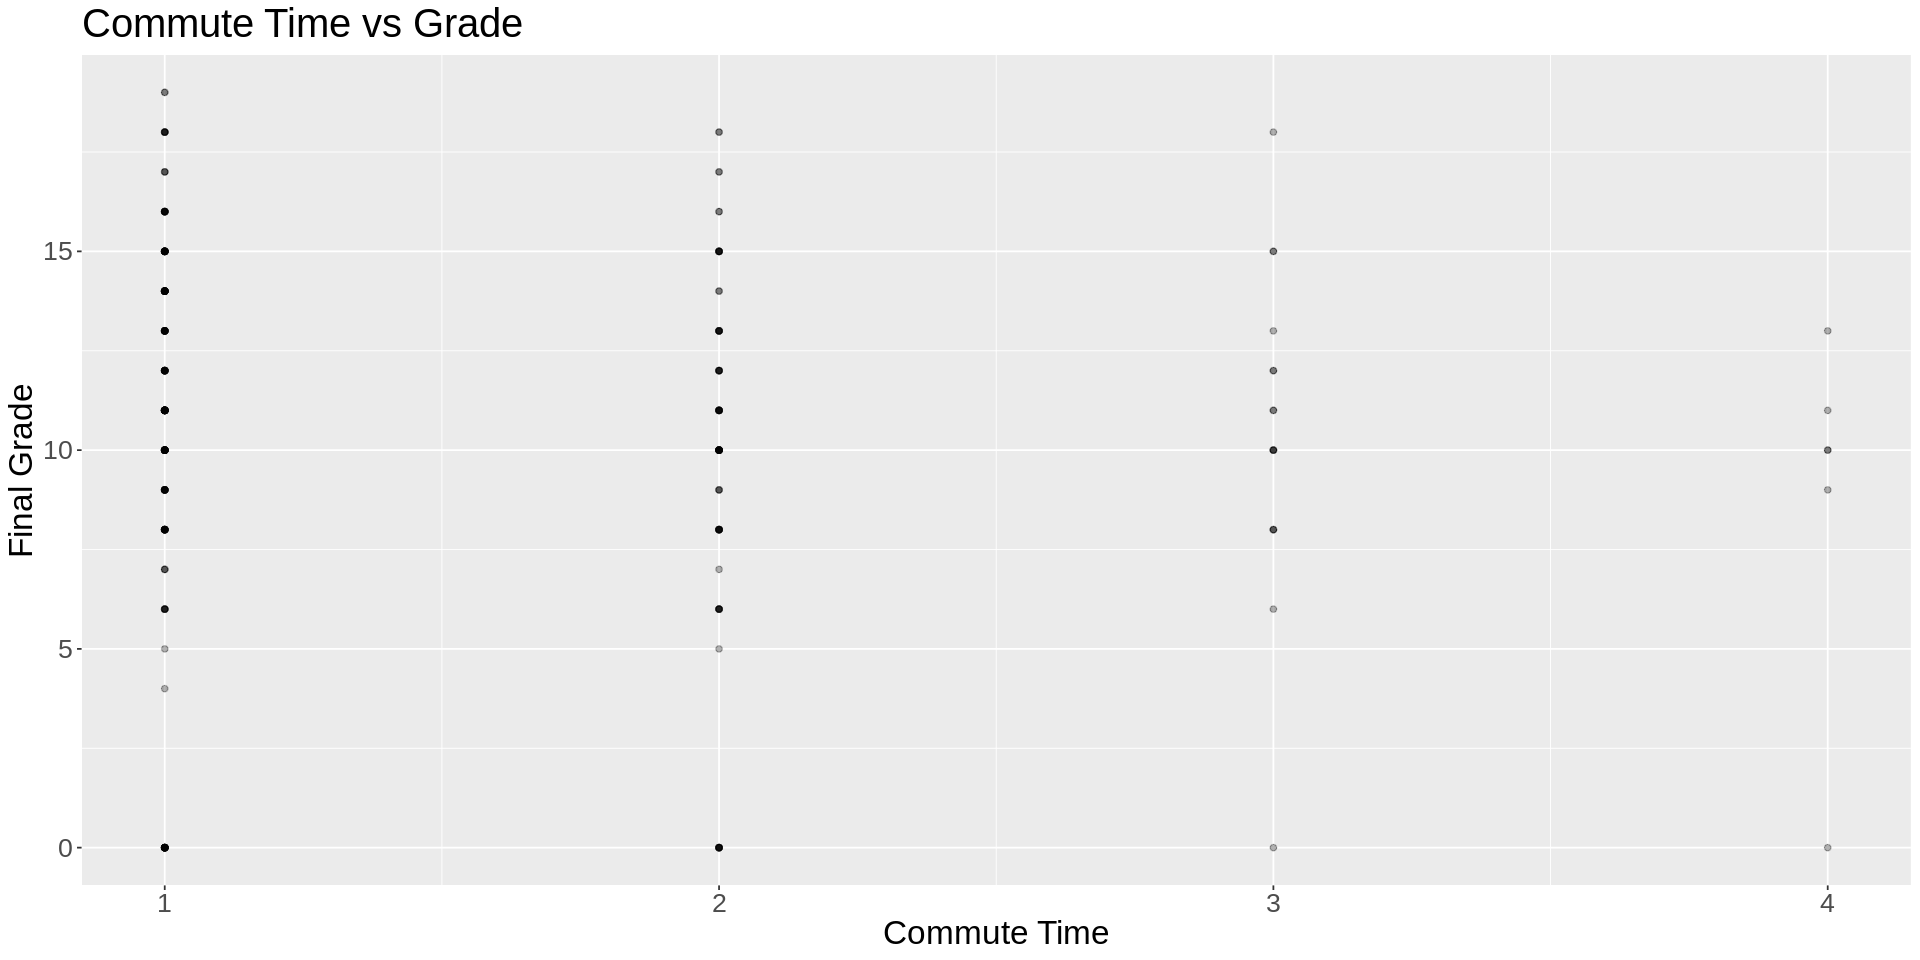

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



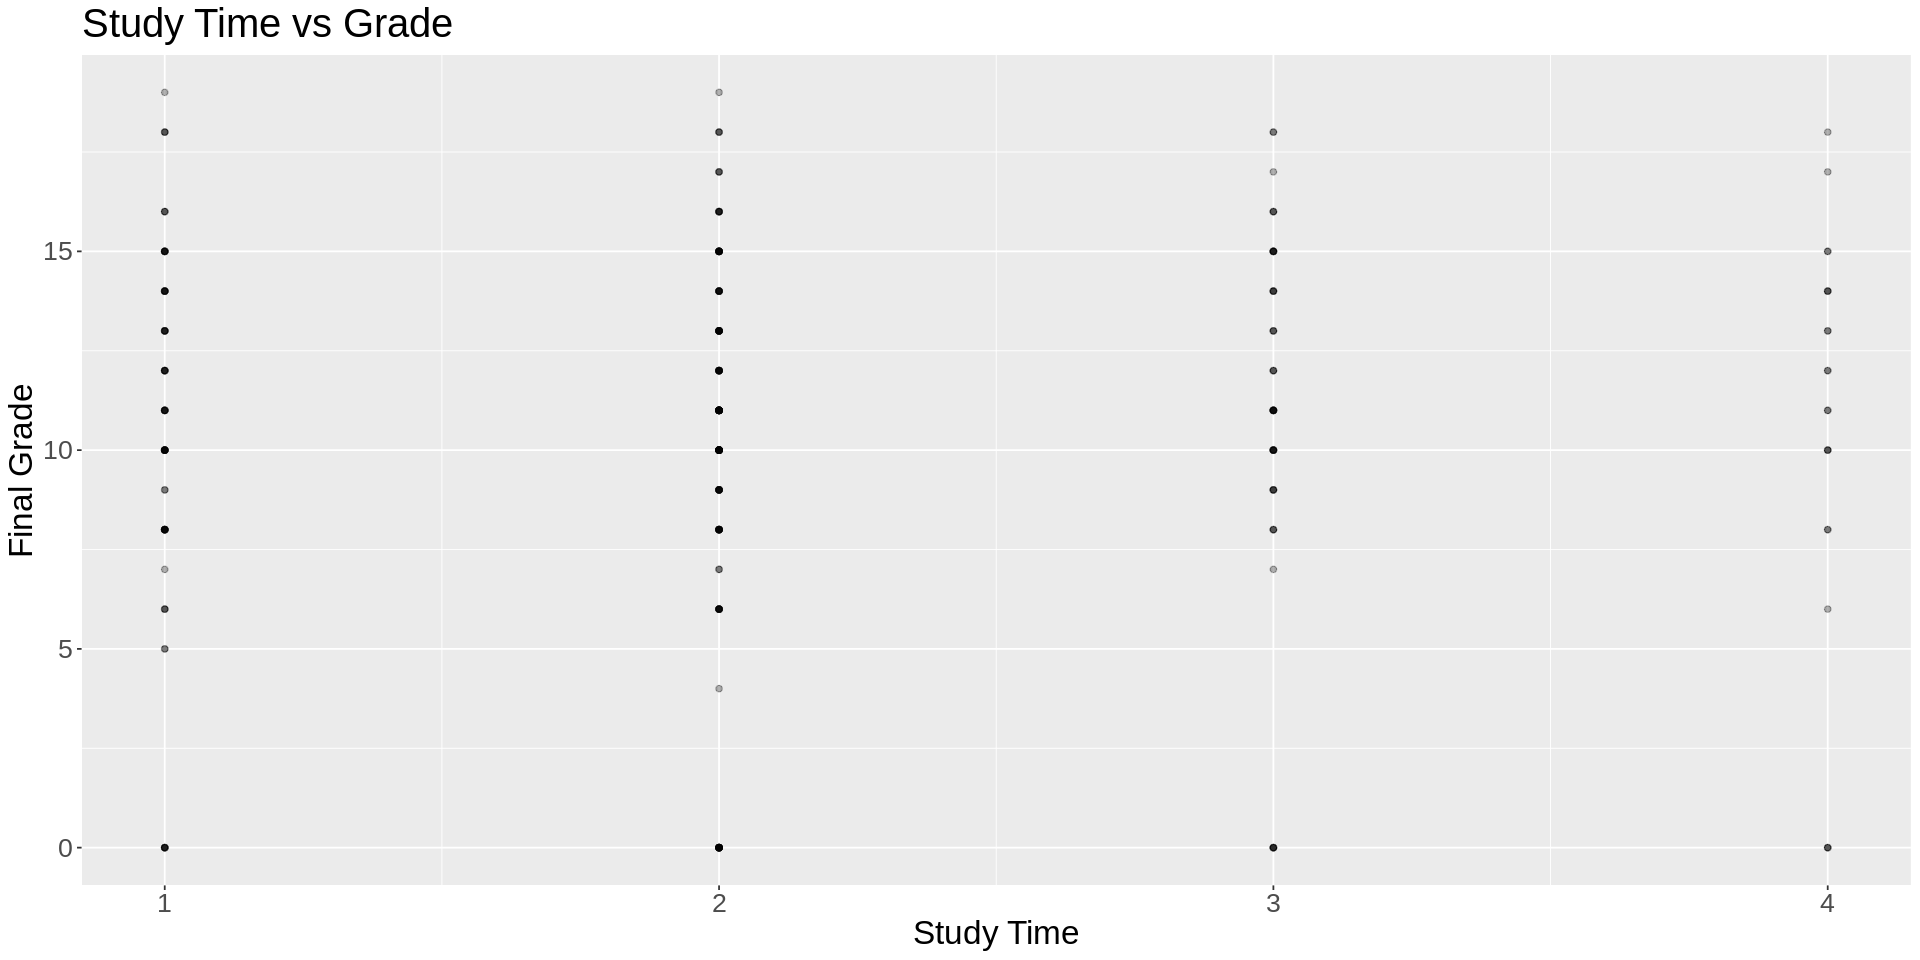

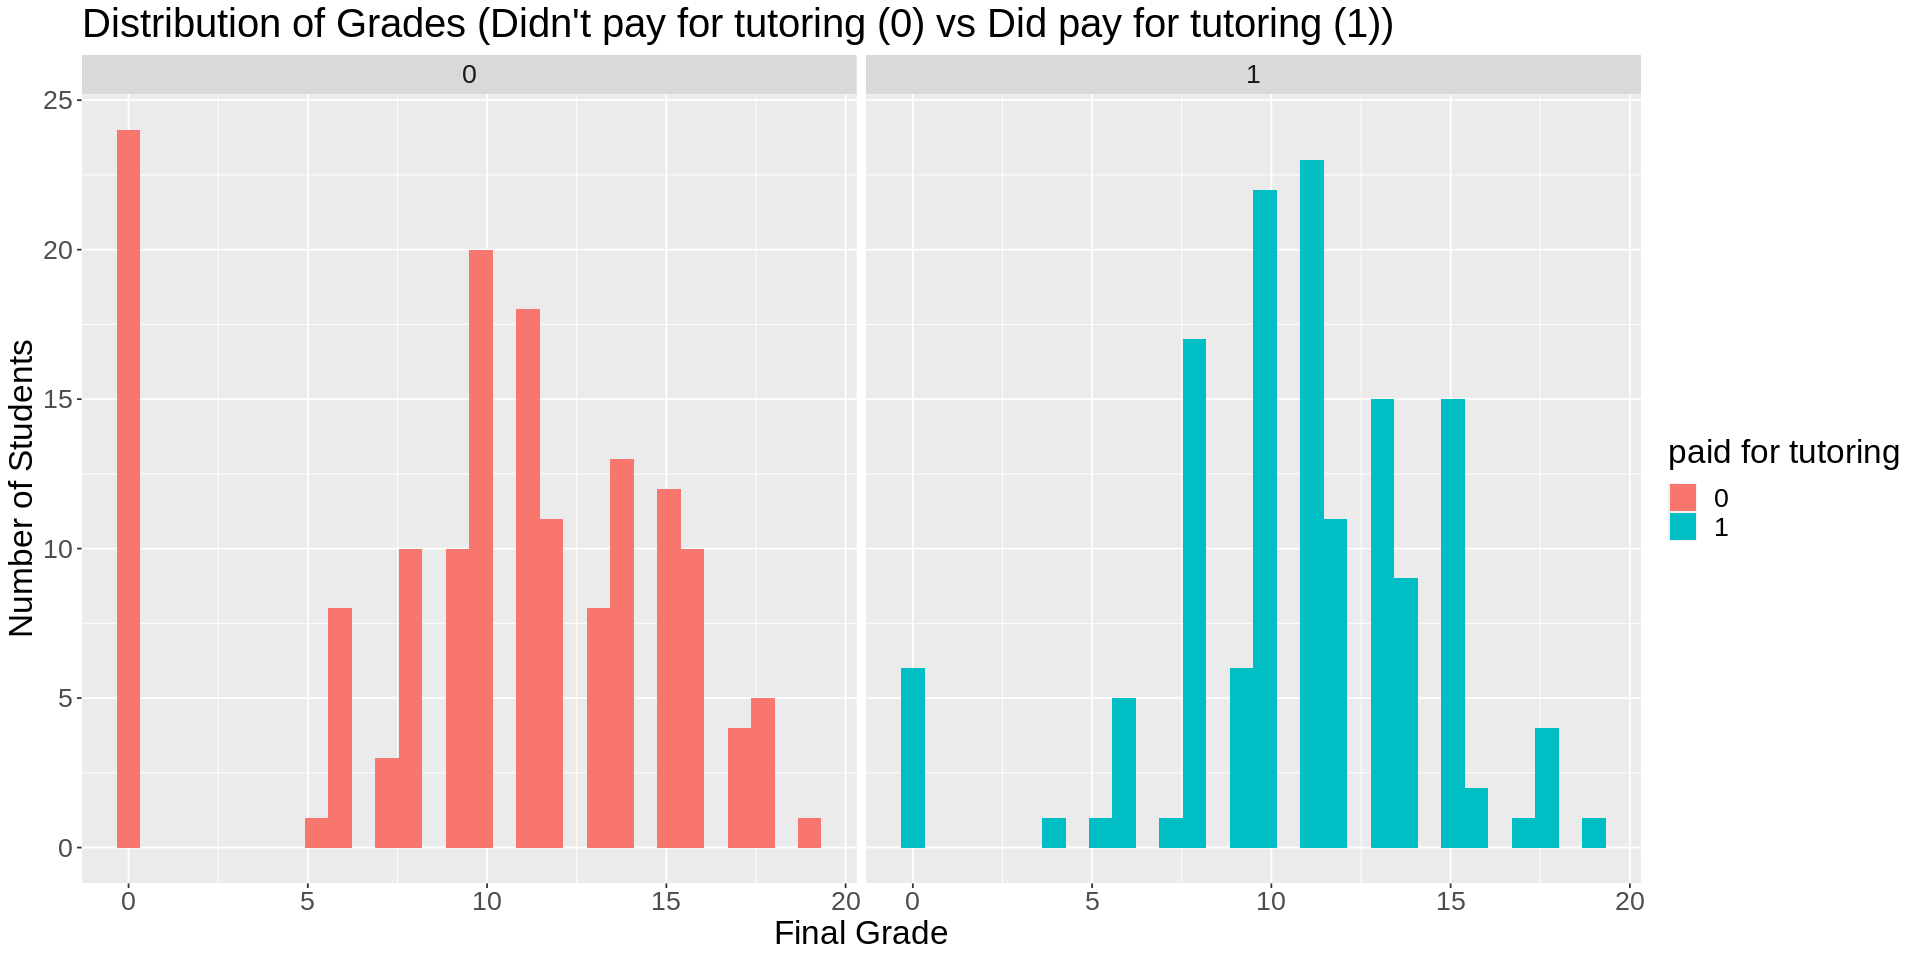

In [106]:
#visualizing dataset, using some of the predictors
ggplot(student_train, aes(x = G3)) +
    geom_histogram() +
    xlab("Final Grade") + 
    ylab("Number of Students") + 
    ggtitle("Distribution of Grades") +
    theme(text = element_text(size = 20))

options(repr.plot.width = 16, repr.plot.height = 8)

ggplot(student_train, aes(x = G3, fill = factor(sex))) +
    geom_histogram() +
    xlab("Final Grade") + 
    ylab("Number of Students") + 
    labs(fill = "sex") +
    ggtitle("Distribution of Grades (Male (0) vs Female (1))") +
    theme(text = element_text(size = 20)) +
    facet_grid(.~sex)

ggplot(student_train, aes(x = G3, fill = factor(address))) +
    geom_histogram() +
    xlab("Final Grade") + 
    ylab("Number of Students") + 
    labs(fill = "address") +
    ggtitle("Distribution of Grades (Rural (0) vs Urban (1))") +
    theme(text = element_text(size = 20)) +
    facet_grid(.~address)

ggplot(student_train, aes(x = absences, y = G3)) +
    geom_point(alpha = 0.3) +
    xlab("Number of Absences") +
    ylab("Final Grade") +
    ggtitle("Absences vs Grade") +
    theme(text = element_text(size = 20))

ggplot(student_train, aes(x = traveltime, y = G3)) +
    geom_point(alpha = 0.3) +
    xlab("Commute Time") +
    ylab("Final Grade") +
    ggtitle("Commute Time vs Grade") +
    theme(text = element_text(size = 20))

ggplot(student_train, aes(x = studytime, y = G3)) +
    geom_point(alpha = 0.3) +
    xlab("Study Time") +
    ylab("Final Grade") +
    ggtitle("Study Time vs Grade") +
    theme(text = element_text(size = 20))

ggplot(student_train, aes(x = G3, fill = factor(paid))) +
    geom_histogram() +
    xlab("Final Grade") + 
    ylab("Number of Students") + 
    labs(fill = "paid for tutoring") +
    ggtitle("Distribution of Grades (Didn't pay for tutoring (0) vs Did pay for tutoring (1))") +
    theme(text = element_text(size = 20)) +
    facet_grid(.~paid)

## Methods

We plan to use the the variables included in the student_data_clean table (sex, address, education of parents, travel time, study time, extra paid classes within the course subject (tutoring/prep school), extracurricular activities, internet access, family relationship, alcohol use, health, and absences) in order to predict their grade (G3). We feel that these are the most relevant variables to use.

After that, we plan to use the knn classification model and training it with those predictors and having it predict the final grade (G3). This will be done using the method taught in class, splitting the data set into a training and testing, using the training set to create the model and find an optimal k-value, and then testing that on the testing set to see its accuracy.

One way we could visualize the results is by making a bar graph that shows the false positives, false negatives, true positives, and true negatives, that way we can see how accurate the model is.

## What do you expect to find: 
- We expect to find that students who come from an archetypal affluent/educated (as in the parents are university educated, and students attend paid classes) family will achieve higher academic success. 
- We expect to find that students who have a very limited number of absences and are in good health, will achieve higher academic success. 
- Although difficult to predict, we expect our classifier to be at least 70% accurate. 
- we expect to find students with no access to the internet to be under the mean grade score. 

What impacts could such findings have: 
- These findings have the potential to further our understanding of factors which contribute to academic success, which based on that could and should lead to new pedagogical approaches or and the development support/resource networks targeted at aiding those who are not high achievers. 
- Ideally this would incite a deep exploration of our current education system (western education) and lead to a form of educational reform based on our current understanding of learning needs. 

What future questions could this lead to: 
- what can we as educators do in order to support and optimize our students' learning and success?
- Are our current educational/pedagogical practices best for our students?
